# Bioinformatics_Assignment : identify top 10 G-reched regions

* Python script to salculate G content in a given window size and identify top 10 G-riched regions in rat mRNA(refSeq) over background(G content from suffled sequence).

* Submission : python script, results file for each question 


1. Step 1 : **Calculating the cut-off value by the backgroud set (provieded)**
    
		a. significat G-content from shuffled sequences (p<0.05)
        
        b. for the preciese calculation -> many times of iteration 

> Write a python script, which takes input sequences from FASTA format(shuffled rat mRNAs) 

    - function 1 : get_fasta(file)

> counts number of G in 100nt window there (G-content) by sliding it down with 1nt movement, stores the results (maybe dictionary data structure) 

    - function 2 : base_count(base="G",seq, window=100, bin=1)

> finds the values reaching more than top 5% of the G-content population.

    * with main function : 
    
         a. G_count --> list 로 저장 
         
         b. top 5% : sort --> len 5% --> sliding  
    
> You have to provide both a python script and value of significant G-content(P<0.05), that will be used as cutoff for following question


2. Step 2 : 
    
 
> Write another Python script, which also takes input sequences from FASTA format(this time input is real rat mRNAs, provided as an attched file)

> calculates G-content as we did in the previous question(number of G in 100nt window with 1nt sliding), stores the result only if the G-content is more than threshold(the cutoff value decied as P<0.05 in the previous step)

> returns the final results as a following tab-delimited text file (containing tabs that separate information with one record per line), comprising name of RefSeq(RefSeq), start position of the window(start), end position of the window(end) and G-content. 

> You have to provide both a python script and an output tab-delimitated text files.

3. Step 3 : Finally, please analyze top 10 G-enriched regions from your results from question2.
    
> What are the names of genes and ther function. 
> Where those top 10 G-enriched regions are located (5'UTR, CDS, or 3'UTR)? 
   

_written in python3

* * *
## 1. Calculate the cut-off value by shuffled RefSeq as H0

### 1.1. func "get_fasta"

#주어진 fasta파일이 불완전 (각 line 별로 \n으로 끊겨있음 )

In [16]:
def get_fasta(file):
    """
    INPUT : address of fasta file 
    RETURN : dictionary of fasta file (key:name_of_seq, value:sequence)
    * sequence line에 \n이 섞인 sequence 처리를 위한 함수 
    """
    fasta_dict={}
    
    with open(file,'r') as fasta:
        for line in fasta:
            line=line.strip("\r\n") #erase new line code 
            if line[0]==">":
                    name=line[1:]
            else : 
                try : fasta_dict[name]+=line #continuous line of sequence 
                except : fasta_dict[name]=line #for the first line of new sequence 

    return fasta_dict

example_file="./example.fasta"
example = get_fasta(example_file)

for key, value in shuffled_dict.items():
    print(key, len(value))

for key, val in example.items():
    print(base_count(val))

### 1.2 func "base_count"

In [17]:
def base_count(base="g", seq="", window=100, interval=1):
    """
    INPUT:base="type of base", seq="subject", window="sliding window, int", bin="sliding interval, int"
    RETRUN: list of distribution of base content in given window size
    """
    g_count=[]
    for idx in range(0, len(seq)-window+1, interval):
        temp=seq[idx:idx+window].count(base) #count the g content in the given window size
        g_count.append(temp)
    return g_count

for name, seq in shuffled_dict.items():
    print(name,len(seq))

### 1.3 main function : calculate the cutoff (p<0.05)

In [18]:
#read shuffled fasta file 
shuffled_file="./Rat_mRNA_refseq_rn6_shuffled.fasta"
shuffled_dict=get_fasta(shuffled_file)

#count g-content and save in the list => check distribution by density plot (below)
g_count_tot=[] #cumulative g count of shuffled fasta 

for name, seq in shuffled_dict.items() :
    g_count_tot+=base_count(base="g",seq=seq)

#calculate the cut-off value (round)
g_count_tot.sort(reverse=True)
cutoff=g_count_tot[round(len(g_count_tot)*0.05)-1]

#save the result
with open("./cutoff,refseq_rno_shuffled.txt", "w") as res:
    res.write(f"Cut_off_for_G_content(p<0.05)\t{cutoff}")

### 1.4 Check the distirbution of H0

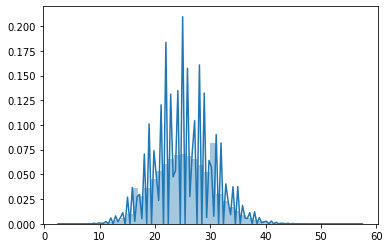

In [20]:
#check the background distribution (show in the jupyter notebook)
import seaborn as sns
sns.distplot(g_count_tot)

* * * 
## 2. Identify the G-rich sequence from Rno-RefSeq

### 2.1 func "base_over_cutoff"

#### cutoff = 35

##### Pandas merge practice 
df=pd.DataFrame(columns=["a","b","c"])
df=df.append({"a":1,"b":2,"c":3}, ignore_index=True) 

In [21]:
import pandas as pd #to do matrix operation

In [22]:
def base_over_cutoff(base="g", fasta={}, window=100, interval=1, cutoff=cutoff):
    """
    INPUT
        1) base : base for counting (default="g")
        2) fasta : dictionary format of subject's fasta
        3) window : sliding window
        4) bin : sliding interval
        5) cutoff : significant cutoff 
    RETURN : "RefSeq", "start", "end", "G-content" ==> dataframe
    """
    result=[]
    
    for name, seq in fasta.items():
        for idx in range(0, len(seq)-window+1, interval):
            base_count=seq[idx:idx+window].count(base) #count the g content in the given window size
            if base_count>cutoff : 
                #result=result.append({"RefSeq":name, "start":idx, "end":idx+window, f"{base.upper()}count":base_count}, ignore_index=True)
                #when using df append, it's too slow. instead, using list append 
                result.append([name, idx, idx+window, base_count])
    
    result_df=pd.DataFrame(result, columns=["RefSeq", "start", "end", f"{base.upper()}count"])
    
    return result_df

### 2.2. Main function

In [75]:
import sys

In [77]:
cutoff_df=pd.read_csv("./cutoff,refseq_rno_shuffled.txt", header=None, sep="\t")
cutoff = int(cutoff_df[1])

In [24]:
refseq_dict=get_fasta("./Rat_mRNA_refseq_rn6.fasta")

In [25]:
rno_Grich=base_over_cutoff(base="g", fasta=refseq_dict, cutoff=cutoff)

In [26]:
#check the length 
print(len(rno_Grich))
rno_Grich.head()

3355329


,RefSeq,start,end,Gcount
0,NM_001106367.3,153,253,35
1,NM_001106367.3,154,254,35
2,NM_001106367.3,157,257,35
3,NM_001106367.3,158,258,36
4,NM_001106367.3,159,259,36


* 길이로 보아 p>0.01이나 p>0.001이 더 적합할 듯 

### 2.3. Save the result

In [27]:
#data frame column이름에 "-"가 있는 경우 다루기 어려워, 저장 시에만 바꿔줌. 
rno_Grich=rno_Grich.sort_values(by="Gcount", ascending=False)
rno_Grich.rename(columns={"Gcount":"G-content"})\
    .to_csv("./rno_Grich,refseq_rn6.txt", header=True, index=False, sep="\t")

In [28]:
rno_Grich.head(n=10) #top10 : Gcount>=64

,RefSeq,start,end,Gcount
2151539,NM_001108824.1,546,646,65
2151546,NM_001108824.1,553,653,64
2151538,NM_001108824.1,545,645,64
154091,NM_001145175.1,695,795,64
683159,NM_001191905.1,355,455,64
154092,NM_001145175.1,696,796,64
2151540,NM_001108824.1,547,647,64
683160,NM_001191905.1,356,456,64
2151541,NM_001108824.1,548,648,64
2151542,NM_001108824.1,549,649,64


### 2.4. Check the distribution

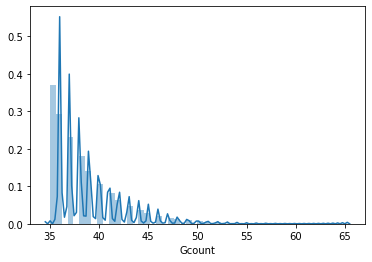

In [30]:
sns.distplot(rno_Grich["Gcount"])

### 2.5. Isolate top10

In [42]:
rno_Grich_top10=rno_Grich[rno_Grich.Gcount>=rno_Grich.iloc[9]["Gcount"]] #top10의 G count수보다 많은 sequence 모두 저장 
rno_Grich_top10

,RefSeq,start,end,Gcount
2151539,NM_001108824.1,546,646,65
2151546,NM_001108824.1,553,653,64
2151538,NM_001108824.1,545,645,64
154091,NM_001145175.1,695,795,64
683159,NM_001191905.1,355,455,64
154092,NM_001145175.1,696,796,64
2151540,NM_001108824.1,547,647,64
683160,NM_001191905.1,356,456,64
2151541,NM_001108824.1,548,648,64
2151542,NM_001108824.1,549,649,64


In [80]:
print(rno_Grich_top10.shape) #total 27sequence
rno_Grich_top10.sort_values(by="RefSeq")

(27, 6)


,index,RefSeq,start,end,Gcount,seq_range
0,2151539,NM_001108824.1,546,646,65,gcgcggcggaggcggcggcggccggggtcgaggacgcggcggcggc...
23,2151553,NM_001108824.1,560,660,64,gcggcggccggggtcgaggacgcggcggcggcgggggcggcggggg...
22,2151534,NM_001108824.1,541,641,64,cgcacgcgcggcggaggcggcggcggccggggtcgaggacgcggcg...
21,2151550,NM_001108824.1,557,657,64,gcggcggcggccggggtcgaggacgcggcggcggcgggggcggcgg...
18,2151549,NM_001108824.1,556,656,64,ggcggcggcggccggggtcgaggacgcggcggcggcgggggcggcg...
17,2151535,NM_001108824.1,542,642,64,gcacgcgcggcggaggcggcggcggccggggtcgaggacgcggcgg...
15,2151547,NM_001108824.1,554,654,64,gaggcggcggcggccggggtcgaggacgcggcggcggcgggggcgg...
14,2151545,NM_001108824.1,552,652,64,cggaggcggcggcggccggggtcgaggacgcggcggcggcgggggc...
25,2151552,NM_001108824.1,559,659,64,ggcggcggccggggtcgaggacgcggcggcggcgggggcggcgggg...
12,2151543,NM_001108824.1,550,650,64,ggcggaggcggcggcggccggggtcgaggacgcggcggcggcgggg...


In [88]:
rno_Grich_top10[rno_Grich_top10.RefSeq=="NM_001145175.1"]

,index,RefSeq,start,end,Gcount,seq_range
3,154091,NM_001145175.1,695,795,64,ccgggggcgctgggggtgcgggtggggggccagggccaggccaggc...
5,154092,NM_001145175.1,696,796,64,cgggggcgctgggggtgcgggtggggggccagggccaggccaggca...
10,154090,NM_001145175.1,694,794,64,gccgggggcgctgggggtgcgggtggggggccagggccaggccagg...
11,154093,NM_001145175.1,697,797,64,gggggcgctgggggtgcgggtggggggccagggccaggccaggcag...
20,154085,NM_001145175.1,689,789,64,gaggcgccgggggcgctgggggtgcgggtggggggccagggccagg...
24,154084,NM_001145175.1,688,788,64,ggaggcgccgggggcgctgggggtgcgggtggggggccagggccag...
26,154087,NM_001145175.1,691,791,64,ggcgccgggggcgctgggggtgcgggtggggggccagggccaggcc...


In [44]:
rno_Grich_top10.RefSeq.unique()

array(['NM_001108824.1', 'NM_001145175.1', 'NM_001191905.1',
       'NR_046239.1', 'NR_046246.1'], dtype=object)

In [46]:
#to get genome coordinate in table browser
with open ("./rno_Grich_top10_id.txt", "w") as txt: 
    for i in rno_Grich_top10.RefSeq.unique():
        txt.write(i)

In [233]:
rno_Grich_bam = pd.read_csv("./rno_Grich.bam.txt", sep = "\t", skiprows=[0], \
                           names=["chrom", "txStart", "txEnd", "name", "score", "strand","cdcStart", "cdsEnd", \
                                    "score2", "exonCount", "exonStart", "exonEnd"])

In [234]:
rno_Grich_bam

,chrom,txStart,txEnd,name,score,strand,cdcStart,cdsEnd,score2,exonCount,exonStart,exonEnd
0,chr1,72545595,72564513,NM_001145175.1,0,+,72553321,72560348,0,6,"91,836,155,51,150,4806,","0,7570,9981,12454,13498,14112,"
1,chr3,147585946,147597660,NM_001191905.1,0,+,147585946,147597660,0,2,"133,785,","0,10929,"
2,chr10,20620956,20622600,NM_001108824.1,0,-,20621186,20622161,0,1,"1644,","0,"
3,chr14,46643221,46655563,NR_046239.1,0,+,46655563,46655563,0,2,"6298,2383,","0,9959,"
4,chr14,46647094,46655563,NR_046246.1,0,+,46655563,46655563,0,2,"2425,2383,","0,6086,"


### 2.6. Get original sequence of Top10
> for blat searching 

* refseq이 들어있는 dictionary에서 sequence 가져오기

In [50]:
rno_Grich_top10 = rno_Grich_top10\
    .assign(seq = lambda df : df['RefSeq'].map(lambda RefSeq : refseq_dict[RefSeq]))\
    .assign(seq_range = lambda df : list(map(lambda seq, start, end : seq[start:end], df['seq'], df['start'], df['end'])))\
    .drop('seq', axis=1)

In [71]:
rno_Grich_top10=rno_Grich_top10.reset_index()

In [89]:
rno_Grich_top10

,index,RefSeq,start,end,Gcount,seq_range
0,2151539,NM_001108824.1,546,646,65,gcgcggcggaggcggcggcggccggggtcgaggacgcggcggcggc...
1,2151546,NM_001108824.1,553,653,64,ggaggcggcggcggccggggtcgaggacgcggcggcggcgggggcg...
2,2151538,NM_001108824.1,545,645,64,cgcgcggcggaggcggcggcggccggggtcgaggacgcggcggcgg...
3,154091,NM_001145175.1,695,795,64,ccgggggcgctgggggtgcgggtggggggccagggccaggccaggc...
4,683159,NM_001191905.1,355,455,64,ggcggcgccgggccggggctggcggggacgcggcaggcgcagggga...
5,154092,NM_001145175.1,696,796,64,cgggggcgctgggggtgcgggtggggggccagggccaggccaggca...
6,2151540,NM_001108824.1,547,647,64,cgcggcggaggcggcggcggccggggtcgaggacgcggcggcggcg...
7,683160,NM_001191905.1,356,456,64,gcggcgccgggccggggctggcggggacgcggcaggcgcaggggat...
8,2151541,NM_001108824.1,548,648,64,gcggcggaggcggcggcggccggggtcgaggacgcggcggcggcgg...
9,2151542,NM_001108824.1,549,649,64,cggcggaggcggcggcggccggggtcgaggacgcggcggcggcggg...


In [72]:
with open ("./rno_Grich_top10_seq.fasta", "w") as fa:
    for idx in range(len(rno_Grich_top10)): 
        fa.write(">" + rno_Grich_top10.RefSeq[idx] + ",st=" + str(rno_Grich_top10.start[idx]) + ",G#=" + str(rno_Grich_top10.Gcount[idx]) \
                 + "\n" + rno_Grich_top10.seq_range[idx]\
                 + "\n")